# Projeto 2 de IF697 - Introdução a Ciência de Dados


*   Alunos: André Valença e Pedro Basílio
*   Professor: Luciano Barbosa
*   Documentação: https://github.com/ProfLuciano/cd/blob/gh-pages/slides/projeto2.pdf 



# 0. Organizando os dados

Selecionando o dataframe, removendo as colunas desnecessárias, categorizando um dado, fazendo o one hot encoding de outro.

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [143]:
l = pd.read_csv("https://raw.githubusercontent.com/aaavalenca/projeto_2_-IF697/main/mobilidados.csv")

In [144]:
l.head()

,CD_UF,UF,CD_MUN6,CD_MUN,MUNICIPIO,CAPITAL,REGIAO METROPOLITANA,Frota_2001,Frota_2002,Frota_2003,...,Frota_2012,Frota_2013,Frota_2014,Frota_2015,Frota_2016,Frota_2017,Frota_2018,Frota_2019,Frota_2020,Frota_2021
0,12,AC,120001,1200013,Acrelândia,Não,-,148,254,380,...,3187,3543,3971,4364,4648,4856,5163,5541,6045,6465
1,12,AC,120005,1200054,Assis Brasil,Não,-,44,65,87,...,795,940,1119,1271,1363,1485,1615,1700,1879,2019
2,12,AC,120010,1200104,Brasiléia,Não,-,683,874,1064,...,4737,5329,6017,6697,7235,7638,8174,8840,9450,10280
3,12,AC,120013,1200138,Bujari,Não,-,34,55,107,...,993,1146,1309,1434,1570,1652,1780,1860,2022,2172
4,12,AC,120017,1200179,Capixaba,Não,-,36,65,98,...,1008,1154,1287,1468,1635,1748,1890,2003,2167,2334


In [145]:
l.dtypes

CD_UF                    int64
UF                      object
CD_MUN6                  int64
CD_MUN                   int64
MUNICIPIO               object
CAPITAL                 object
REGIAO METROPOLITANA    object
Frota_2001               int64
Frota_2002               int64
Frota_2003               int64
Frota_2004               int64
Frota_2005               int64
Frota_2006               int64
Frota_2007               int64
Frota_2008               int64
Frota_2009               int64
Frota_2010               int64
Frota_2011               int64
Frota_2012               int64
Frota_2013               int64
Frota_2014               int64
Frota_2015               int64
Frota_2016               int64
Frota_2017               int64
Frota_2018               int64
Frota_2019               int64
Frota_2020               int64
Frota_2021               int64
dtype: object

In [146]:
# Removendo desnecessários

l = l.drop('MUNICIPIO', axis=1).drop('CD_UF', axis=1).drop('CD_MUN6', axis=1).drop('CD_MUN', axis=1).drop('REGIAO METROPOLITANA', axis=1)

In [147]:
l.head()

,UF,CAPITAL,Frota_2001,Frota_2002,Frota_2003,Frota_2004,Frota_2005,Frota_2006,Frota_2007,Frota_2008,...,Frota_2012,Frota_2013,Frota_2014,Frota_2015,Frota_2016,Frota_2017,Frota_2018,Frota_2019,Frota_2020,Frota_2021
0,AC,Não,148,254,380,605,847,1061,1288,1627,...,3187,3543,3971,4364,4648,4856,5163,5541,6045,6465
1,AC,Não,44,65,87,115,159,236,294,366,...,795,940,1119,1271,1363,1485,1615,1700,1879,2019
2,AC,Não,683,874,1064,1228,1468,1749,2117,2565,...,4737,5329,6017,6697,7235,7638,8174,8840,9450,10280
3,AC,Não,34,55,107,157,219,274,336,441,...,993,1146,1309,1434,1570,1652,1780,1860,2022,2172
4,AC,Não,36,65,98,129,171,239,348,449,...,1008,1154,1287,1468,1635,1748,1890,2003,2167,2334


In [148]:
l.isnull().values.any()

False

In [149]:
l.describe()

,Frota_2001,Frota_2002,Frota_2003,Frota_2004,Frota_2005,Frota_2006,Frota_2007,Frota_2008,Frota_2009,Frota_2010,...,Frota_2012,Frota_2013,Frota_2014,Frota_2015,Frota_2016,Frota_2017,Frota_2018,Frota_2019,Frota_2020,Frota_2021
count,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,...,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03
mean,5.223276e+03,5.618993e+03,6.015244e+03,6.444061e+03,6.920718e+03,7.480798e+03,8.206751e+03,9.029427e+03,9.854898e+03,1.077149e+04,...,1.266629e+04,1.357400e+04,1.442221e+04,1.508192e+04,1.559630e+04,1.613367e+04,1.674165e+04,1.740750e+04,1.791870e+04,1.847674e+04
std,5.868858e+04,6.161065e+04,6.422297e+04,6.679588e+04,6.999387e+04,7.427024e+04,7.969464e+04,8.587978e+04,9.137130e+04,9.608481e+04,...,1.044963e+05,1.086794e+05,1.136633e+05,1.176497e+05,1.208289e+05,1.243728e+05,1.285033e+05,1.330042e+05,1.357134e+05,1.380668e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.100000e+01,9.000000e+00,8.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00
25%,1.822500e+02,2.210000e+02,2.660000e+02,3.162500e+02,3.642500e+02,4.350000e+02,5.042500e+02,5.892500e+02,6.790000e+02,7.812500e+02,...,1.007250e+03,1.126250e+03,1.235250e+03,1.327500e+03,1.404000e+03,1.471250e+03,1.542000e+03,1.610250e+03,1.693250e+03,1.783750e+03
50%,6.155000e+02,6.900000e+02,7.820000e+02,8.875000e+02,9.780000e+02,1.088500e+03,1.229000e+03,1.388000e+03,1.564500e+03,1.784500e+03,...,2.227500e+03,2.470500e+03,2.689000e+03,2.884500e+03,3.035000e+03,3.179500e+03,3.316000e+03,3.456500e+03,3.605500e+03,3.787000e+03
75%,1.927500e+03,2.126250e+03,2.342750e+03,2.591750e+03,2.824500e+03,3.072500e+03,3.441750e+03,3.871500e+03,4.340750e+03,4.772500e+03,...,5.944500e+03,6.549250e+03,7.101750e+03,7.518500e+03,7.903000e+03,8.255000e+03,8.606500e+03,9.020000e+03,9.424750e+03,9.788500e+03
max,3.796711e+06,3.977491e+06,4.139511e+06,4.296386e+06,4.494597e+06,4.771165e+06,5.114957e+06,5.513047e+06,5.845428e+06,6.095515e+06,...,6.501475e+06,6.714695e+06,7.015043e+06,7.270780e+06,7.475969e+06,7.700558e+06,7.950995e+06,8.209314e+06,8.391816e+06,8.507507e+06


In [150]:
l["UF"].unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [151]:
l["CAPITAL"].unique()

array(['Não', 'Sim'], dtype=object)

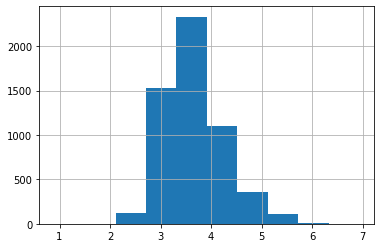

In [152]:
# Os dados são distribuídos logaritmicamente, por conta do tamanho das cidades

l["Frota_2021"].apply(np.log10).hist()

## One hot encoding

Não vamos usar de fato, pois usaremos apenas os dados numéricos, mas vamos fazer um processo aqui apenas para demonstrar.

In [153]:
# Vendo quais são as com maior frota atualmente

l.groupby("UF").sum().sort_values("Frota_2021", ascending=False)

,Frota_2001,Frota_2002,Frota_2003,Frota_2004,Frota_2005,Frota_2006,Frota_2007,Frota_2008,Frota_2009,Frota_2010,...,Frota_2012,Frota_2013,Frota_2014,Frota_2015,Frota_2016,Frota_2017,Frota_2018,Frota_2019,Frota_2020,Frota_2021
UF,,,,,,,,,,,,,,,,,,,,,
SP,10479722,11120530,11726049,12387248,13156526,14119987,15337079,16652255,17880303,19196525,...,21786615,22984871,24074875,24920390,25609890,26379038,27248432,28185930,28847315,29452035
MG,3095800,3304116,3532779,3762891,4037389,4382741,4831158,5363478,5879699,6460080,...,7659691,8204909,8713866,9116225,9473636,9877221,10322672,10818192,11102097,11508252
PR,2265129,2439038,2635359,2873201,3108955,3344715,3661321,4007943,4322782,4663090,...,5389621,5746038,6077970,6298966,6461473,6637325,6856556,7107117,7314208,7542118
RS,2420781,2584207,2761576,2948366,3123273,3306810,3538276,3810977,4085309,4369744,...,5020750,5359751,5664159,5883535,6058902,6242464,6448570,6656528,6822109,6987084
RJ,2420433,2589084,2723852,2857823,3003923,3170707,3404576,3669995,3939390,4254169,...,4936331,5270462,5594401,5839571,6013457,6165834,6342302,6557189,6688780,6886291
SC,1425531,1557072,1697672,1855680,2030201,2215862,2436675,2656860,2886284,3133685,...,3622811,3860577,4083148,4246772,4383715,4543946,4730433,4936317,5108671,5278406
BA,795140,883017,973975,1064157,1173092,1297258,1453960,1648855,1873149,2124487,...,2652076,2912176,3163222,3365071,3516255,3662126,3823653,4001194,4159317,4328600
GO,926122,1011642,1098583,1193607,1297352,1417705,1592651,1797672,1987496,2195945,...,2635671,2842455,3028799,3165076,3261283,3362996,3483471,3609048,3731384,3868162
CE,647275,711101,772022,831054,898707,988200,1108077,1240437,1404090,1613903,...,2048665,2256965,2458806,2632028,2752124,2858928,2975118,3102748,3209041,3319156


In [154]:


# Para fazer o one-hot-encoding, selecionamos os 6 estados com maior frota
# atualmente e colocamos os outros como "OUTROS". Porque senão é um número
# muito grande para ohe

uf = ['SP', 'MG', 'PR', 'RS', 'RJ', 'SC']
l['uf_cat'] = np.where(l['UF'].isin(uf), l['UF'], 'OUTRO')

l.groupby("uf_cat").sum().sort_values("Frota_2021", ascending=False)
# pd.get_dummies(l['uf_cat'])


,Frota_2001,Frota_2002,Frota_2003,Frota_2004,Frota_2005,Frota_2006,Frota_2007,Frota_2008,Frota_2009,Frota_2010,...,Frota_2012,Frota_2013,Frota_2014,Frota_2015,Frota_2016,Frota_2017,Frota_2018,Frota_2019,Frota_2020,Frota_2021
uf_cat,,,,,,,,,,,,,,,,,,,,,
OUTRO,6986249,7703745,8427623,9208211,10088132,11127221,12502518,14132402,15898014,17919916,...,22135391,24180558,26123311,27700858,28870343,30018710,31302038,32698496,33923980,35261243
SP,10479722,11120530,11726049,12387248,13156526,14119987,15337079,16652255,17880303,19196525,...,21786615,22984871,24074875,24920390,25609890,26379038,27248432,28185930,28847315,29452035
MG,3095800,3304116,3532779,3762891,4037389,4382741,4831158,5363478,5879699,6460080,...,7659691,8204909,8713866,9116225,9473636,9877221,10322672,10818192,11102097,11508252
PR,2265129,2439038,2635359,2873201,3108955,3344715,3661321,4007943,4322782,4663090,...,5389621,5746038,6077970,6298966,6461473,6637325,6856556,7107117,7314208,7542118
RS,2420781,2584207,2761576,2948366,3123273,3306810,3538276,3810977,4085309,4369744,...,5020750,5359751,5664159,5883535,6058902,6242464,6448570,6656528,6822109,6987084
RJ,2420433,2589084,2723852,2857823,3003923,3170707,3404576,3669995,3939390,4254169,...,4936331,5270462,5594401,5839571,6013457,6165834,6342302,6557189,6688780,6886291
SC,1425531,1557072,1697672,1855680,2030201,2215862,2436675,2656860,2886284,3133685,...,3622811,3860577,4083148,4246772,4383715,4543946,4730433,4936317,5108671,5278406


In [155]:
l['CAPITAL'] = l['CAPITAL'].astype("category")

In [156]:
l.dtypes

UF              object
CAPITAL       category
Frota_2001       int64
Frota_2002       int64
Frota_2003       int64
Frota_2004       int64
Frota_2005       int64
Frota_2006       int64
Frota_2007       int64
Frota_2008       int64
Frota_2009       int64
Frota_2010       int64
Frota_2011       int64
Frota_2012       int64
Frota_2013       int64
Frota_2014       int64
Frota_2015       int64
Frota_2016       int64
Frota_2017       int64
Frota_2018       int64
Frota_2019       int64
Frota_2020       int64
Frota_2021       int64
uf_cat          object
dtype: object

In [157]:
ohe = OneHotEncoder()
arr = ohe.fit_transform(l[["uf_cat"]]).toarray()
arr

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [158]:
ohe.categories_

[array(['MG', 'OUTRO', 'PR', 'RJ', 'RS', 'SC', 'SP'], dtype=object)]

In [159]:
l = l.drop("UF", axis=1).drop("uf_cat", axis=1).drop("CAPITAL", axis=1)

In [160]:
l.head()

,Frota_2001,Frota_2002,Frota_2003,Frota_2004,Frota_2005,Frota_2006,Frota_2007,Frota_2008,Frota_2009,Frota_2010,...,Frota_2012,Frota_2013,Frota_2014,Frota_2015,Frota_2016,Frota_2017,Frota_2018,Frota_2019,Frota_2020,Frota_2021
0,148,254,380,605,847,1061,1288,1627,1974,2368,...,3187,3543,3971,4364,4648,4856,5163,5541,6045,6465
1,44,65,87,115,159,236,294,366,439,525,...,795,940,1119,1271,1363,1485,1615,1700,1879,2019
2,683,874,1064,1228,1468,1749,2117,2565,3095,3669,...,4737,5329,6017,6697,7235,7638,8174,8840,9450,10280
3,34,55,107,157,219,274,336,441,562,711,...,993,1146,1309,1434,1570,1652,1780,1860,2022,2172
4,36,65,98,129,171,239,348,449,567,741,...,1008,1154,1287,1468,1635,1748,1890,2003,2167,2334


# 1. Regressão

Escolhemos trabalhar com a regressão para predizer a Frota_2021 a partir dos dados dos anos anteriores

In [161]:
l.head()

,Frota_2001,Frota_2002,Frota_2003,Frota_2004,Frota_2005,Frota_2006,Frota_2007,Frota_2008,Frota_2009,Frota_2010,...,Frota_2012,Frota_2013,Frota_2014,Frota_2015,Frota_2016,Frota_2017,Frota_2018,Frota_2019,Frota_2020,Frota_2021
0,148,254,380,605,847,1061,1288,1627,1974,2368,...,3187,3543,3971,4364,4648,4856,5163,5541,6045,6465
1,44,65,87,115,159,236,294,366,439,525,...,795,940,1119,1271,1363,1485,1615,1700,1879,2019
2,683,874,1064,1228,1468,1749,2117,2565,3095,3669,...,4737,5329,6017,6697,7235,7638,8174,8840,9450,10280
3,34,55,107,157,219,274,336,441,562,711,...,993,1146,1309,1434,1570,1652,1780,1860,2022,2172
4,36,65,98,129,171,239,348,449,567,741,...,1008,1154,1287,1468,1635,1748,1890,2003,2167,2334


In [162]:
l["Frota_2021"]

0        6465
1        2019
2       10280
3        2172
4        2334
        ...  
5565    17484
5566      490
5567      414
5568     2191
5569     4729
Name: Frota_2021, Length: 5570, dtype: int64

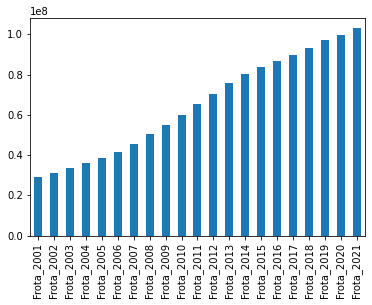

In [163]:
l.sum().plot(kind='bar')

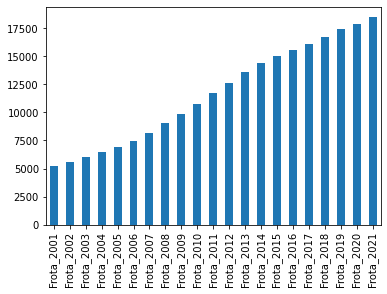

In [164]:
l.mean().plot(kind='bar')

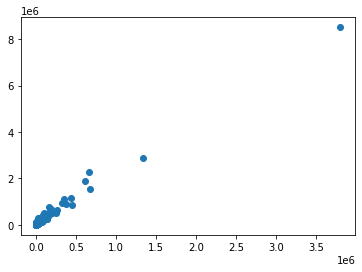

In [165]:
plt.scatter(x=l["Frota_2001"], y=l["Frota_2021"])

# 2. Separar os dados em treinamento, validação e teste

Serve para avaliar o modelo e evitar overfitting

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
    classification_report,
    accuracy_score,
    mean_absolute_percentage_error
)

# O y é a coluna que queremos prever, o x é todo o resto que nos ajudará a prever
y = l["Frota_2021"]
x = l.drop("Frota_2021", axis=1)

# divisão entre teste e treinamento, o random state mantém a mesma ordem
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# forma simples de pegar a validação, usando o test split de novo
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [167]:
# test e val de mesmo tamanho. train evidentemente maior

len(x_train), len(y_train), len(x_test), len(y_test), len(x_val), len(y_val)

(3342, 3342, 1114, 1114, 1114, 1114)

# 3. Selecionar 4 algoritmos de regressão

* Regressão Linear
* Decision Tree
* Random Forest
* Multilayer perceptron

In [97]:
# MLFLOW

!pip install mlflow --quiet
!pip install optuna --quiet
import mlflow
import mlflow.sklearn
import optuna

In [98]:
mlflow.sklearn.autolog()
runs = []

## 1. Regressão Linear

Pela maneira os gráficos estão plotados, é de se imaginar que uma Regressão Linear já será suficiente para prever.

In [99]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [100]:
with mlflow.start_run() as linear_run:
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_percentage_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    print("Mean squared error: %s" % mse)
    print("Mean absolute percentage error: %s" % mae)
    print("R2-score: %s" % r2)

    mlflow.log_metric("mse", mse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)

    runs.append(linear_run)

2022/09/21 14:47:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.7/dist-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Mean squared error: 2061565.8854669253
Mean absolute percentage error: 0.018242946922896044
R2-score: 0.9997628560850383


In [101]:
y_test.array[0:10]

<PandasArray>
[77114, 814, 2157, 10314, 5683, 1876, 15690, 2743, 4191, 4195]
Length: 10, dtype: int64

In [102]:
pred[0:10]

array([77222.71152638,   846.42641844,  2161.21608534, 10350.65759864,
        5688.49331355,  1877.20196092, 15613.44670598,  2759.84366084,
        4228.53661471,  4241.21286084])

In [103]:
(y_test.array/pred).mean()

0.9895573200114399

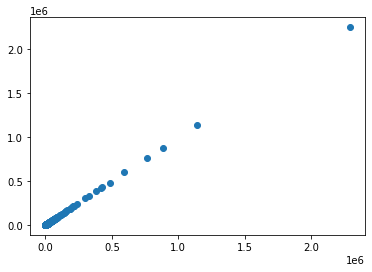

In [104]:
plt.scatter(x=y_test, y=pred)

plt.show()

## 2. Decision tree

In [105]:
from sklearn.tree import DecisionTreeRegressor
T = DecisionTreeRegressor()

In [106]:
with mlflow.start_run() as decisiontree_run:
    T.fit(x_train, y_train)

    pred2 = T.predict(x_test)

    print("Mean squared error: %s" % mean_squared_error(y_test, pred2))
    print("Mean absolute percentage error: %s" % mean_absolute_percentage_error(y_test, pred2))
    print("R2-score: %s" % r2_score(y_test, pred2))

    runs.append(decisiontree_run)

2022/09/21 14:47:11 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.7/dist-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Mean squared error: 508180086.51166964
Mean absolute percentage error: 0.019900397392931497
R2-score: 0.9415435538245606


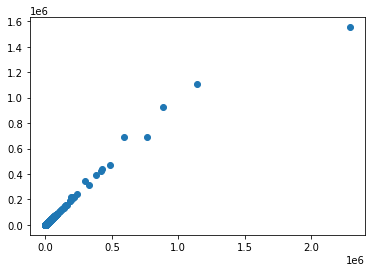

In [107]:
plt.scatter(x=y_test, y=pred2)

plt.show()

## 3. Random forest
Por ser uma regressão simples, o R2-score foi pior, mesmo sendo um modelo mais sofisticado que Decision Trees e Linear Regression. Explicação: overfitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [109]:
# Treinando sem pruning (para ver se tem overfitting)
RF1 = RandomForestRegressor(n_estimators=50)

with mlflow.start_run() as randomforest_run:
    RF1.fit(x_train,y_train)
    pred3a = RF1.predict(x_test)

    print("Mean squared error: %s" % mean_squared_error(y_test, pred3a))
    print("Mean absolute percentage error: %s" % mean_absolute_percentage_error(y_test, pred3a))
    print("R2-score: %s" % r2_score(y_test, pred3a))

    runs.append(randomforest_run)

2022/09/21 14:47:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.7/dist-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Mean squared error: 392200024.8215447
Mean absolute percentage error: 0.01550818385212615
R2-score: 0.9548848523397223


In [110]:
RF1.score(x_test,y_test)

0.9548848523397223

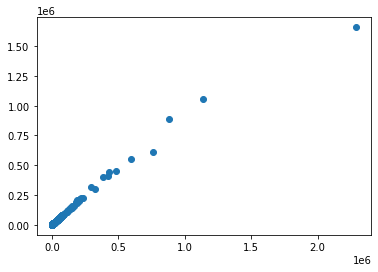

In [111]:
plt.scatter(x=y_test, y=pred3a)

plt.show()

In [112]:
# Treinando com pruning (para ver se tem overfitting).
# Para isso, utilizemos o hiperparâmetro min_samples_leaf
RF2 = RandomForestRegressor(n_estimators=50, min_samples_leaf=25)

RF2.fit(x_train,y_train)
pred3b = RF2.predict(x_test)

print("Mean squared error: %s" % mean_squared_error(y_test, pred3b))
print("Mean absolute percentage error: %s" % mean_absolute_percentage_error(y_test, pred3b))
print("R2-score: %s" % r2_score(y_test, pred3b))

2022/09/21 14:47:20 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '610820af84d64ef3b33be8bb65c715f7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/09/21 14:47:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.7/dist-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <htt

Mean squared error: 3913441624.9193397
Mean absolute percentage error: 0.03737711122457885
R2-score: 0.5498330301012917


In [113]:
print("Sem pruning")
print("MSE Train: %s" % mean_absolute_error(y_train, RF1.predict(x_train)))
print("MSE Test: %s" % mean_absolute_error(y_test, RF1.predict(x_test)))
print("\n")
print("Com pruning")
print("MSE Train: %s" % mean_absolute_error(y_train, RF2.predict(x_train)))
print("MSE Test: %s" % mean_absolute_error(y_test, RF2.predict(x_test)))

Sem pruning
MSE Train: 968.6349072411731
MSE Test: 1133.631526032316


Com pruning
MSE Train: 6907.430498490388
MSE Test: 6281.586314096803


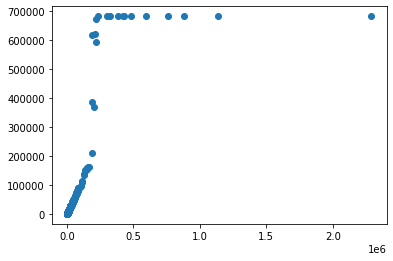

In [114]:
plt.scatter(x=y_test, y=pred3b)

plt.show()

Nada indica que há overfitting, já que o MSE do treino e o teste são igualmente baixos sem prunning e igualmente altos com. Seria um indicativo se o MSE de teste fosse mais baixo com pruning e mais alto sem. Vê-se pelo gráfico que o primeiro generaliza melhor a função. Uma solução para se aproximar a um algoritmo tão simplório quanto a Regressão Linear é mexer nos hiperparâmetros, o que será feito mais para frente.

## 4. MultiLayer Perceptron
Algoritmo com rede neural

In [115]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor()

In [116]:
with mlflow.start_run() as mlp_run:
    MLP.fit(x_train, y_train)
    pred4 = MLP.predict(x_test)
    print("Mean squared error: %s" % mean_squared_error(y_test, pred4))
    print("Mean absolute percentage error: %s" % mean_absolute_percentage_error(y_test, pred4))
    print("R2-score: %s" % r2_score(y_test, pred4))

    runs.append(mlp_run)

2022/09/21 14:47:30 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.7/dist-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Mean squared error: 369696557.5705491
Mean absolute percentage error: 0.2210488886080934
R2-score: 0.9574734479125014


OBS.: como algoritmo, começamos a tentar fazer o Arima para séries temporais, mas como seriam mais de 5k colunas (as cidades) de resultado, o tempo de processamento era imenso. Seria funcional se escolhêssemos uma cidade (Recife, por exemplo) e fizéssemos a predição baseada no tempo para ela.

# 4. Adicionar MLFlow no treinamento

Analisar o que foi colhido com o MLFLOW

In [168]:
from pprint import pprint

In [173]:
for run in runs:
  client = mlflow.tracking.MlflowClient()
  data = client.get_run(run.info.run_id).data
  tags = {k: v for k, v in data.tags.items() if not k.startswith("mlflow.")}
  artifacts = [f.path for f in client.list_artifacts(run.info.run_id, "model")]

  print(tags['estimator_name'])
  print('\nParameters:')
  pprint(data.params)
  print('\nMetrics:')
  pprint(data.metrics)
  print('\n_________________________________________\n')

print('\nArtifacts:')
pprint(artifacts)

LinearRegression

Parameters:
{'copy_X': 'True',
 'fit_intercept': 'True',
 'n_jobs': 'None',
 'normalize': 'deprecated',
 'positive': 'False'}

Metrics:
{'mae': 0.018242946922896044,
 'mean_absolute_percentage_error_x_test': 0.018242946922896044,
 'mean_squared_error_x_test': 2061565.8854669253,
 'mse': 2061565.8854669253,
 'r2': 0.9997628560850383,
 'r2_score_x_test': 0.9997628560850383,
 'training_mae': 109.56696060495837,
 'training_mse': 63636.34213805838,
 'training_r2_score': 0.999997525903773,
 'training_rmse': 252.26244694377002,
 'training_score': 0.999997525903773}

_________________________________________

DecisionTreeRegressor

Parameters:
{'ccp_alpha': '0.0',
 'criterion': 'squared_error',
 'max_depth': 'None',
 'max_features': 'None',
 'max_leaf_nodes': 'None',
 'min_impurity_decrease': '0.0',
 'min_samples_leaf': '1',
 'min_samples_split': '2',
 'min_weight_fraction_leaf': '0.0',
 'random_state': 'None',
 'splitter': 'best'}

Metrics:
{'mean_absolute_percentage_error_x

# 5. Executar uma ferramenta de seleção de hiper-parâmetro sobre o conjunto de validação

* Selecionar poucos hiper-parâmetros por algoritmo (max. 3)
* Selecionar o modelo (algoritmo + valores de hiper-parâmetros) com melhor resultado na métrica de avaliação
* Executar o melhor modelo de cada algoritmo no conjunto de teste e selecionar o melhor modelo geral na métrica de avaliação

Os melhores resultados de acordo com o MLFlow de MSE e R2 foram da Regressão Linear e do MultiLayer Perceptron.
Vamos nos concentrar neles.
Como o RL não tem hiperparâmetros para tunar, vamos apenas rodar o optuna nele; enquanto que, no MLP, entraremos manualmente com 3 valores para ser observar. Abaixo, o que o MLFlow gerou com o default:

Parameters:
{'activation': 'relu',
 'alpha': '0.0001',
 'batch_size': 'auto',
 'beta_1': '0.9',
 'beta_2': '0.999',
 'early_stopping': 'False',
 'epsilon': '1e-08',
 'hidden_layer_sizes': '(100,)',
 'learning_rate': 'constant',
 'learning_rate_init': '0.001',
 'max_fun': '15000',
 'max_iter': '200',
 'momentum': '0.9',
 'n_iter_no_change': '10',
 'nesterovs_momentum': 'True',
 'power_t': '0.5',
 'random_state': 'None',
 'shuffle': 'True',
 'solver': 'adam',
 'tol': '0.0001',
 'validation_fraction': '0.1',
 'verbose': 'False',
 'warm_start': 'False'}

In [305]:
def linear_regression_optuna(trial):
    
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    return mean_squared_error(y_test, pred)

# O tamanho das hidden_layers, onde está a rede neural de fato, é bem importante
# para esse algoritmo. O número máximo de iterações também importa, embora possa
# gerar overfitting. E o último que vamos mexer é o alpha, que controla
# a regularização aplicada aos pesos da rede. É, talvez, o mais importante,
# porque determina a minúcia da curva.

def mlp_optuna(trial):
    hls = trial.suggest_int("hidden_layer_sizes", 200, 400)
    mi = trial.suggest_int("max_iter", 400, 800)
    al = trial.suggest_float("alpha", 0.00005, 0.0001)

    MLP2 = MLPRegressor(hidden_layer_sizes=hls, max_iter=mi, alpha=al)
    MLP2.fit(x_train, y_train)
    # MLP.fit(x_train, y_train, hidden_layer_sizes=hls, max_iter=mi, alpha=al)
    pred4 = MLP2.predict(x_test)
    return mean_squared_error(y_test, pred4)

In [246]:
# não importa, mas aqui está
study1 = optuna.create_study(direction="minimize")
study1.optimize(linear_regression_optuna, n_trials=1)

[I 2022-09-21 21:45:43,319] A new study created in memory with name: no-name-66d94673-4799-45db-ab0c-2e0d1168e4ce
2022/09/21 21:45:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd6cc35d97d5741ceaeb049c3d1574cc0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/09/21 21:45:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.7/dist-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as

In [248]:
print(study1.best_trial.value)

2061565.8854669253


In [283]:
print(MLPRegressor().get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [ ]:
# MLP
study2 = optuna.create_study(direction="minimize")
study2.optimize(mlp_optuna, n_trials=50)

In [308]:
print(study2.best_trial.value)
print(study2.best_trial.params)

43309092.95985377
{'hidden_layer_sizes': 257, 'max_iter': 674, 'alpha': 8.006120973801926e-05}


# 6. Realizar diagnóstico do melhor modelo geral da etapa 5 e melhorá-lo a partir do diagnóstico

Elegemos a Regressão Linear como melhor algoritmo para resolver essa questão. Embora mais simples, ele casa quase perfeitamente com os dados, não necessita de tunagem de parâmetros e tem os melhores resultados. Não há, a bem dizer, como melhorá-lo.

O MLP, por outro lado, é um canhão matando pombo. Para os dados que temos, é um algoritmo mais sofisticado do que o problema. Abaixo, construímos um MLP com os parâmetros selecionados pelo Optuna e predizemos o y do conjunto de validação.

In [309]:
MLP2 = MLPRegressor(hidden_layer_sizes=257, max_iter=674, alpha=0.00008)
MLP2.fit(x_train, y_train)
pred4 = MLP2.predict(x_val)

2022/09/21 23:39:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3a829bb3a7f04f63b037fc7012ab7b97', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/09/21 23:39:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.7/dist-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <htt

In [310]:
print("Mean squared error: %s" % mean_squared_error(y_val, pred4))
print("Mean absolute percentage error: %s" % mean_absolute_percentage_error(y_val, pred4))
print("R2-score: %s" % r2_score(y_val, pred4))

Mean squared error: 13331710.402475104
Mean absolute percentage error: 0.16718707860624002
R2-score: 0.9985872554715667


Pode-se ver que o refinamento de parâmetrou deu resultado. O R2-score subiu e o erro caiu, tudo isso sendo testado no grupo de validação.